# Importing Libraries and Data

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# file path
path = r'/Users/Evan/Desktop/MLB Team Stats Project'

In [3]:
# data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'mlb_teams_clean_rates.csv'))

In [4]:
# Dropping non numerical and total values columns. Total values will greatly exceed rate stats and could skew data and clustering
df = df.drop(columns = ['year', 'league_id', 'division_id', 'rank', 'games_played', 'losses', 'division_winner', 'wild_card_winner', 'league_winner', 'world_series_winner', 'runs_scored', 'plate_appearances', 'at_bats', 'doubles', 'triples', 'walks', 'strikeouts_by_pitchers', 'stolen_bases', 'caught_stealing', 'batters_hit_by_pitch', 'sacrifice_flies', 'opponents_runs_scored', 'earned_runs_allowed', 'complete_games', 'shutouts', 'saves', 'walks_allowed', 'strikeouts_by_pitchers', 'errors', 'double_plays', 'team_name', 'state', 'city'])

In [5]:
# drop check
df.columns

Index(['Unnamed: 0', 'wins', 'win_percentage', 'batting_average',
       'on_base_percentage', 'slugging_percentage', 'ops', 'hits', 'homeruns',
       'total_bases', 'strikeouts_by_batters', 'stolen_base_success_pct',
       'earned_run_average', 'innings_pitched', 'whip', 'hits_allowed',
       'homeruns_allowed', 'fielding_percentage'],
      dtype='object')

# Step 3.

In [6]:
# defining range of clusters for Kmeans algorithm 
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [7]:
# Creating rate of variation score
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

/Users/Evan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Evan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Evan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Evan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

In [8]:
# variation score output
score

[-1452233832.1298118,
 -643904142.457288,
 -463084501.31400067,
 -299406042.0827245,
 -250077136.52398926,
 -209981367.19436017,
 -174899125.38621175,
 -152563504.34203005,
 -140772593.32785004]

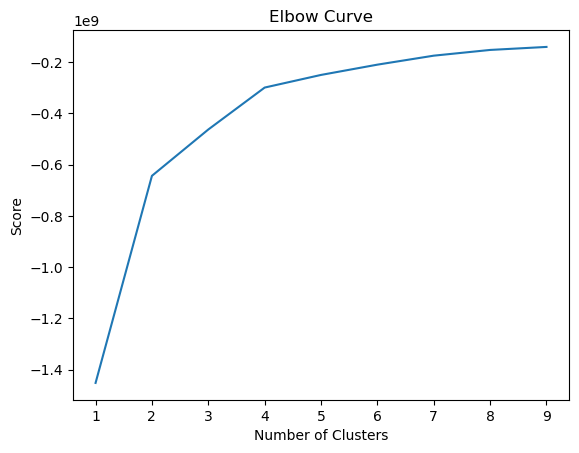

In [9]:
# Elbow curve plot
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Step 4. 

I am choosing to use 4 clusters as the elbow curve begins to flatten out after a slight jump from 3 to 4.

# Step 5.

In [10]:
# defining number of clusters
kmeans = KMeans(n_clusters = 4)

In [11]:
# fitting algorithm to dataframe
kmeans.fit(df)

/Users/Evan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

# Step 6. 

In [12]:
# creating clusters columns for visualizations
df['clusters'] = kmeans.fit_predict(df)

/Users/Evan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# data check
df.head()

,Unnamed: 0,wins,win_percentage,batting_average,on_base_percentage,slugging_percentage,ops,hits,homeruns,total_bases,strikeouts_by_batters,stolen_base_success_pct,earned_run_average,innings_pitched,whip,hits_allowed,homeruns_allowed,fielding_percentage,clusters
0,0,72,0.467532,0.269,0.337,0.350,0.687,1397,22,1821,429,0.469,3.82,1378.30,1.41,1481,39,0.972,3
1,1,93,0.600000,0.277,0.322,0.367,0.688,1493,28,1980,391,0.467,2.62,1387.25,1.23,1381,25,0.966,3
2,2,62,0.405229,0.260,0.311,0.339,0.650,1358,23,1767,488,0.473,3.54,1369.35,1.37,1464,39,0.964,3
3,3,96,0.623377,0.295,0.353,0.402,0.755,1574,37,2144,353,0.538,3.59,1378.30,1.36,1467,45,0.969,3
4,4,75,0.487013,0.264,0.321,0.354,0.674,1350,34,1809,421,0.471,3.27,1378.30,1.34,1459,37,0.965,3


In [14]:
# value check
df['clusters'].value_counts()

clusters
2    802
1    730
3    639
0     81
Name: count, dtype: int64

# Step 7. 

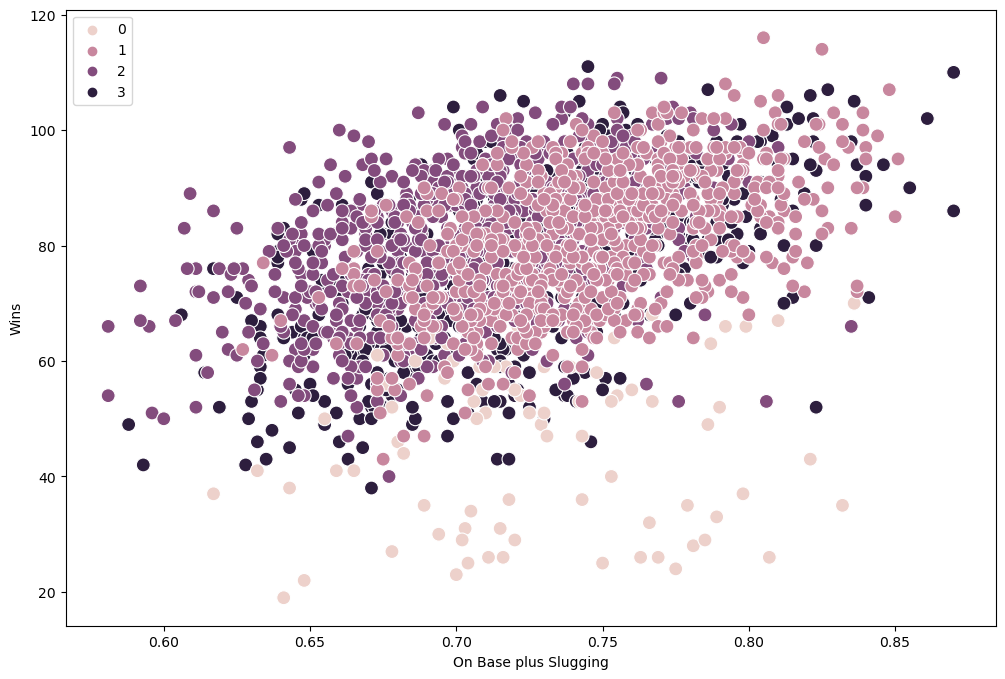

In [15]:
# OPS vs Wins

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['ops'], y=df['wins'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('On Base plus Slugging') 
plt.ylabel('Wins')
plt.show()

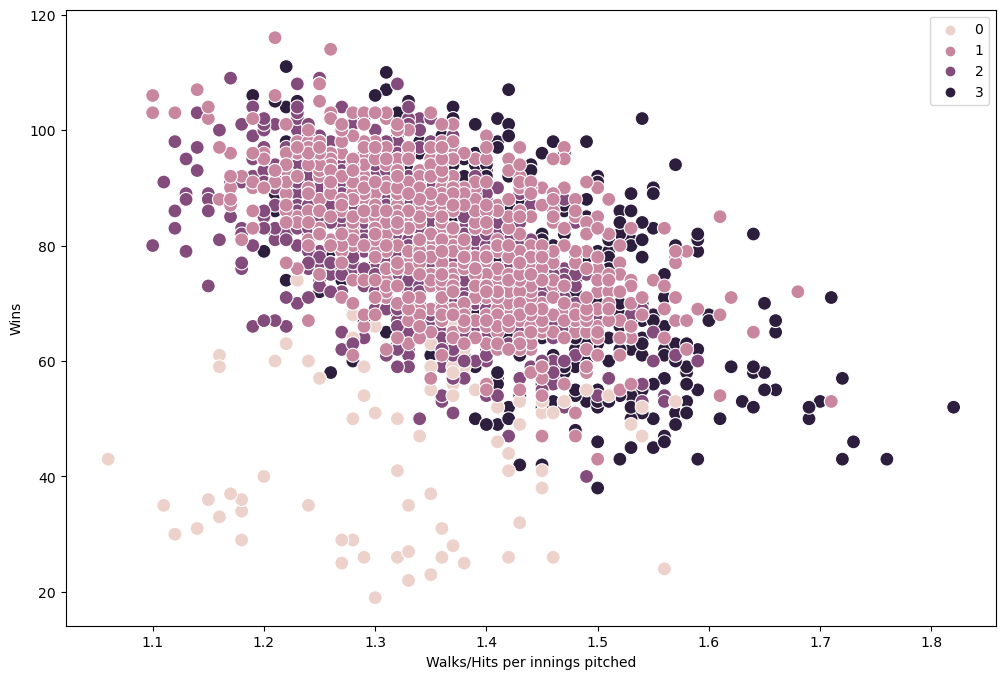

In [16]:
WHIP vs Wins

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['whip'], y=df['wins'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Walks/Hits per innings pitched') 
plt.ylabel('Wins')
plt.show()

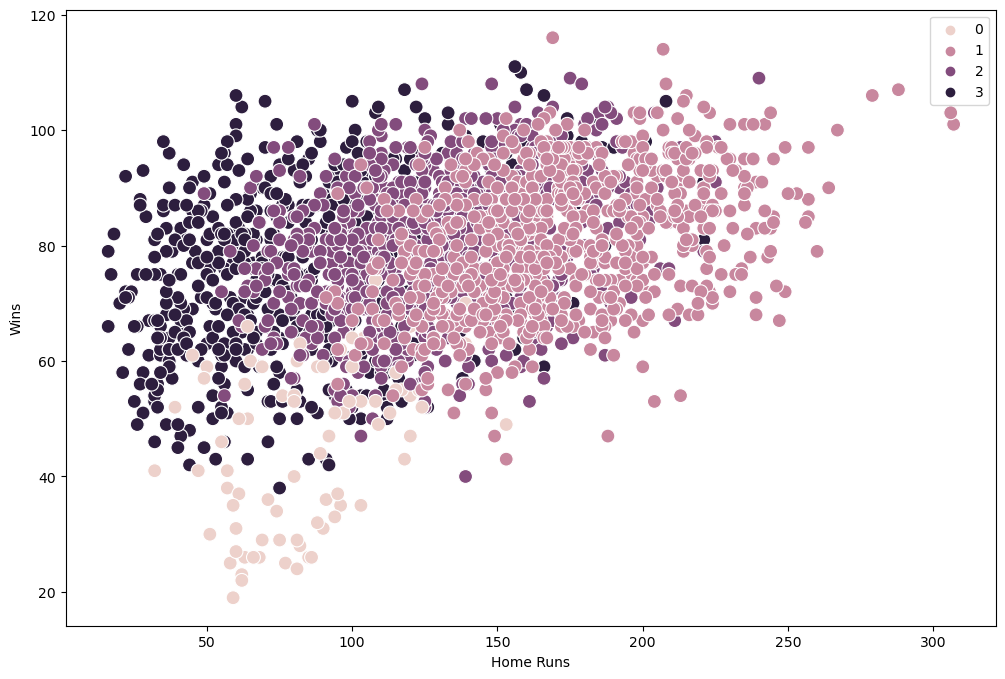

In [17]:
# Home Runs vs Wins

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['homeruns'], y=df['wins'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Home Runs') 
plt.ylabel('Wins')
plt.show()

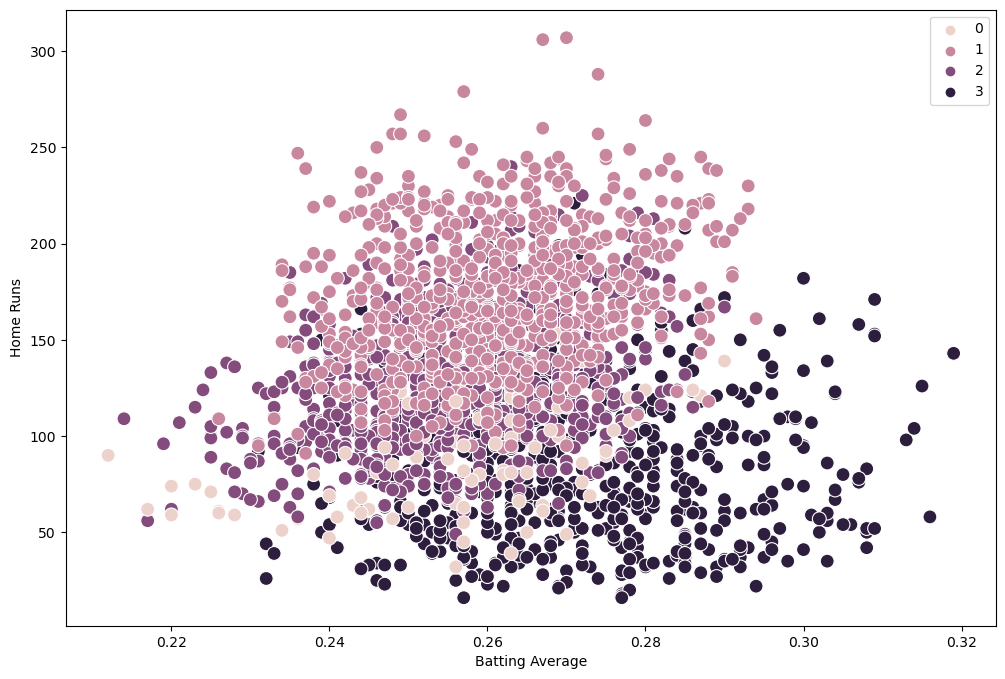

In [18]:
# Batting average vs Home Runs

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['batting_average'], y=df['homeruns'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Batting Average') 
plt.ylabel('Home Runs')
plt.show()

# Step 8. 

Some clusters make more sense than others here.

The chart plotting home runs against batting average is explanatory of the tradeoff between hitting for power and hitting for a high batting average. As we observe the team batting average breaking the .300 mark, we see that the home run totals never eclispe 200. This clustering is representative of the notion that teams/hitters who pursue more home runs, typically sacrifice batting average to varying degrees. 

The chart plotting WHIP vs Wins shows that as the number of baserunners a team allows per inning increases, the number of wins that team records will begin to decrease. As the WHIP crosses the 1.5 mark, the wins totals become increasingly weighed down. This evidences the fact that the more baserunners a team allows per inning, the harder it becomes for them to win games. 

# Step 9. 

In [20]:
# renaming clusters to corresponding color
df.loc[df['clusters'] == 3, 'cluster'] = 'black'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [22]:
# aggregating cluster stats
df.groupby('cluster').agg({'wins':['mean', 'median'],
                         'ops':['mean', 'median'], 
                         'batting_average':['mean', 'median'],                       
                         'whip':['mean', 'median'],
                         'earned_run_average':['mean', 'median'],
                         'win_percentage':['mean', 'median'],
                         'hits':['mean', 'median'],
                         'homeruns':['mean', 'median']})

wins              ops        batting_average         \
                 mean median      mean median            mean median   
cluster                                                                
black       76.724570   78.0  0.723626  0.724        0.270836  0.269   
light pink  45.851852   49.0  0.728321  0.721        0.255481  0.257   
pink        81.056164   81.0  0.746962  0.745        0.261136  0.261   
purple      80.118454   81.0  0.702960  0.704        0.255512  0.256   

                whip        earned_run_average        win_percentage  \
                mean median               mean median           mean   
cluster                                                                
black       1.415524   1.41           4.011674  3.950       0.496999   
light pink  1.334198   1.35           4.170864  4.010       0.499378   
pink        1.365370   1.36           4.296466  4.265       0.500811   
purple      1.333379   1.33           3.765137  3.750       0.498398   

                             hits            homeruns         
              median         mean  median        mean median  
cluster                                                       
black       0.503226  1440.472613  1432.0   88.746479   85.0  
light pink  0.485437   802.814815   922.0   85.654321   82.0  
pink        0.500000  1448.008219  1444.0  173.620548  171.0  
purple      0.500000  1395.367830  1398.0  128.615960  125.0

# Step 10. 

The Pink and Purple clusters emerge as the winningiest clusters overall. Although each cluster holds a win percentage of right around .500 which is an even finish. We can see from these clusters that offense and defense impact winning separately and a game can be one on either side of the field. 

We can take these results further to understand that the factors and differences that determine what make up a winning team are very small and can go unnoticed without careful scrutiny. We cannot simply assume that a team with a lower earned run average will produce more wins than another team because another team may produce a much higher OPS or Batting Average which can counteract a slightly higher earned run average to generate wins. 

These subtle difference can be analyzed further and perhaps the use of 3D plots to visualize an offensive metric and a defensive metric against winning will hold more weight as we can tell from this aggregation that these factors can have separate and equal impacts on generating wins. 